# Identifying most common amenities that give Airbnb hosts a competitive advantage over others in Guateng & Cape Town, South Africa

This notebook looks into using various Python-based data science libraries in an attempt to 
identify the most common amenities that give Airbnb hosts a competitive advantage as per host listings in Guateng & Cape Town, South Africa.
I am going to take the following appproach:
1. Problem definition
2. Data source description
3. Data dictionary 
4. Fetching data
5. Exploratory analysis
5. Data analysis
    * look at common amenities vs review rating
    * look at common amenities vs review comments (need to categorize what is positive & negative comment)
    * If possible gather revenue data from other sources and look at common amenities vs income made by airbnb hosts
5. Data visualization and communication 
6. Findings 
6. Conclusion

## 1. Problem definition 
In a statement,
>Given airbnb review data can we identify common amenities that give airbnb hosts a competitive advantage over other hosts based on review ratings and review comments.

## 2. Data source description 
The original dataset came from Inside Airbnb web database:

1. Cape town dataset link: http://data.insideairbnb.com/south-africa/wc/cape-town/2021-03-25/data/listings.csv.gz
2. Gauteng dataset link: http://data.insideairbnb.com/south-africa/gt/gauteng/2021-03-29/data/listings.csv.gz

## 3. Data dictionary 

You can find further information about each of the columns in our dataframe by following this link: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

## 4. Fetching data 
The airbnb dataset for cape town was downloaded from previously shown link. I then moved the csv file from downloads to my data project directory.

In [36]:
# Importing airbnb data from Gauteng,SA into notebook
import pandas as pd
listings_Guateng = pd.read_csv("data/listings_Guateng.csv", low_memory=False)
listings_Guateng.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18536,https://www.airbnb.com/rooms/18536,2.021030e+13,02/04/2021,Cottage on our property,<b>The space</b><br />Peaceful. We live on 200...,NaN,https://a0.muscache.com/pictures/94672/b7c0f7e...,71321,https://www.airbnb.com/users/show/71321,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,18769,https://www.airbnb.com/rooms/18769,2.021030e+13,02/04/2021,Tranquil Home- Johannesburg,<b>The space</b><br />Centrally located 5 min...,NaN,https://a0.muscache.com/pictures/12406772/54bf...,72045,https://www.airbnb.com/users/show/72045,...,10.0,9.0,8.0,NaN,f,1,0,1,0,0.04
2,18783,https://www.airbnb.com/rooms/18783,2.021030e+13,29/03/2021,accomodation in Pretoria,<b>The space</b><br />Great deal on accommodat...,NaN,https://a0.muscache.com/pictures/96128/d61fd4e...,72080,https://www.airbnb.com/users/show/72080,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
3,18828,https://www.airbnb.com/rooms/18828,2.021030e+13,01/04/2021,3 bedroom flat in the Orchards Pretoria,The flat is situated in the orchards in Pretor...,NaN,https://a0.muscache.com/pictures/118315/9b30e8...,72240,https://www.airbnb.com/users/show/72240,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,18839,https://www.airbnb.com/rooms/18839,2.021030e+13,29/03/2021,Dream house for you,<b>The space</b><br />Home boost well design o...,NaN,https://a0.muscache.com/pictures/96402/54c3d57...,72245,https://www.airbnb.com/users/show/72245,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN


In [37]:
# Importing airbnb data for Capetown, SA into notebook 
listings_cape_town = pd.read_csv("data/listings_cape_town.csv", low_memory=False)
listings_cape_town.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20210325031109,2021-03-25,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.57
1,15007,https://www.airbnb.com/rooms/15007,20210325031109,2021-03-27,Blaauwberg House,Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,https://www.airbnb.com/users/show/59072,...,10.0,10.0,10.0,NaN,f,6,6,0,0,0.33
2,15068,https://www.airbnb.com/rooms/15068,20210325031109,2021-03-25,Grande Bay,Modern spacious apartment. Three bedrooms two...,Close to Eden on The Bay and lots of restauran...,https://a0.muscache.com/pictures/a09b3f0d-d43b...,59318,https://www.airbnb.com/users/show/59318,...,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN
3,15077,https://www.airbnb.com/rooms/15077,20210325031109,2021-03-27,Top relaxed beach living in style,Situated either on the ground floor with direc...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,https://www.airbnb.com/users/show/59342,...,10.0,10.0,10.0,NaN,f,5,1,4,0,0.05
4,15180,https://www.airbnb.com/rooms/15180,20210325031109,2021-03-25,The Melkbaai - Beachfront,Comfortable and safe self catering flat for 2 ...,"Apartment is located in Beach Road, Strand, We...",https://a0.muscache.com/pictures/e679464f-f75d...,59663,https://www.airbnb.com/users/show/59663,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


## 5. Exploratory analysis
### 1. Gauteng 
Performed exploratory analysis for airbnb data from Gauteng

In [4]:
# Checking data types
listings_Guateng.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
# check shape of data
listings_Guateng.shape

(13250, 74)

In [45]:
# Check general summary of statistics
listings_Guateng.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.325000e+04,1.325000e+04,1.325000e+04,12834.000000,12834.000000,0.0,13250.000000,13250.000000,13250.000000,0.0,...,7582.000000,7587.000000,7579.000000,7579.000000,0.0,13250.000000,13250.000000,13250.000000,13250.000000,7765.000000
mean,3.180046e+07,2.021030e+13,1.647204e+08,13.305672,13.305672,NaN,-26.043909,28.101386,3.236679,NaN,...,9.574914,9.560564,9.604697,9.378942,NaN,4.843774,2.666491,1.985208,0.046566,0.896000
std,1.248803e+07,0.000000e+00,1.111117e+08,257.464769,257.464769,NaN,0.203897,0.153286,2.576591,NaN,...,1.190526,1.225386,1.058320,1.312570,NaN,10.029516,7.880529,3.888990,0.282622,1.362584
min,1.853600e+04,2.021030e+13,6.474400e+04,0.000000,0.000000,NaN,-26.906800,27.266470,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.252427e+07,2.021030e+13,6.468189e+07,1.000000,1.000000,NaN,-26.154148,28.015200,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.403442e+07,2.021030e+13,1.512255e+08,2.000000,2.000000,NaN,-26.090200,28.068620,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.400000
75%,4.233047e+07,2.021030e+13,2.555017e+08,4.000000,4.000000,NaN,-25.915382,28.213712,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,5.000000,2.000000,2.000000,0.000000,1.120000
max,4.893131e+07,2.021030e+13,3.944842e+08,7755.000000,7755.000000,NaN,-25.339100,28.930460,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,88.000000,72.000000,34.000000,4.000000,38.570000


In [6]:
type(listings_Guateng.amenities)

pandas.core.series.Series

In [7]:
# trying to estimate the most common amenities from the pandas series data 
listings_Guateng.amenities.value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         86
["Air conditioning", "TV", "Long term stays allowed", "Cable TV", "Essentials", "Breakfast", "Wifi"]                                                                                                                                                                                                                                                                                             

**Arbitrary common amenities for exploratory analysis**

I had to come up with top 10 arbitrary common amenities to explore. Based on a rough visual look at the value count `listings_Guateng.amenities.value_counts()`. For now these may be worth looking at as possible common amenities :
* Long terms stays allowed
* Air conditioning 
* TV
* Cable TV
* Essentials 
* Breakfast
* Wifi
* Free parking on premises 
* Hot tub 
* Luggage dropoff allowed

**Note:** This is just exploratory analysis for now. In future I would want to really pick up on the amenities that appear the most instead of estimating

In [8]:
# Counting the number of times long terms stays and other amenities appear from review data
long_term_guateng = listings_Guateng.amenities.str.contains(r'Long term stays allowed').sum()
long_term_guateng = int(long_term_guateng) # converting to integer for easy downstream analysis
type(long_term_guateng)
long_term_guateng

11724

In [9]:
# Counting number of times air conditioning appears
air_con_guateng = listings_Guateng.amenities.str.contains(r'Air conditioning').sum()
air_con_guateng = int(air_con_guateng)
air_con_guateng

3605

In [10]:
# counting number of times tv appears
tv_guateng = listings_Guateng.amenities.str.contains(r'TV').sum()
tv_guateng = int(tv_guateng)
tv_guateng

11111

In [12]:
# Counting number of times cable tv appears
cable_tv_guateng = listings_Guateng.amenities.str.contains(r'Cable TV').sum()
cable_tv_guateng = int(cable_tv_guateng)

In [15]:
# Counting number of times essentials appears
essentials_guateng = listings_Guateng.amenities.str.contains(r'Essentials').sum()
essentials_guateng = int(essentials_guateng)

In [16]:
# Counting number of times breakfast appears
breakfast_guateng = listings_Guateng.amenities.str.contains(r'Breakfast').sum()
breakfast_guateng = int(breakfast_guateng)

In [17]:
# Counting number of times Free parking appears
free_parking_guateng = listings_Guateng.amenities.str.contains(r'Free parking on premises').sum()
free_parking_guateng = int(free_parking_guateng)

In [18]:
# Counting number of times hot tub appears
hot_tub_guateng = listings_Guateng.amenities.str.contains(r'Hot tub').sum()
hot_tub_guateng = int(hot_tub_guateng)

In [19]:
# Counting number of times luggage dropoff appears
luggage_drop_guateng = listings_Guateng.amenities.str.contains(r'Luggage dropoff allowed').sum()
luggage_drop_guateng = int(luggage_drop_guateng)

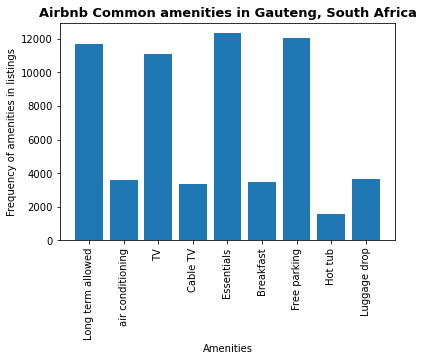

In [46]:
# Visualizing data for common amenities in airbnbs in Guateng, SA
import matplotlib.pyplot as plt # Import relevant libraries
#we want our plot to appear inside the notebook
%matplotlib inline
matplotlib.pyplot.bar(x = ["Long term allowed", "air conditioning", "TV",
                           "Cable TV","Essentials", "Breakfast",
                           "Free parking", "Hot tub",
                          "Luggage drop"],
                      height = [long_term_guateng,air_con_guateng, tv_guateng, cable_tv_guateng, essentials_guateng,
                          breakfast_guateng, free_parking_guateng,hot_tub_guateng,luggage_drop_guateng]);
plt.xticks(rotation=90)
plt.xlabel("Amenities")
plt.ylabel("Frequency of amenities in listings")
plt.title("Airbnb Common amenities in Gauteng, South Africa", fontweight="bold", fontsize=13);

The above plot shows that most common amenities listed by airbnb hosts in Guateng are: Long term stays allowed, TV, Essentials and Free parking.

As per an airbnb blog post (https://news.airbnb.com/amenities-do-matter-airbnb-reveals-which-amenities-guests-search-for-most/), most people prefer comfort over connectivity. Survey data indicated that a large number of people in the US (59%), Australia (46%) and Italy (39%) prefer air conditioning as an important indoor amenities over internet/wifi and full kitchens.

Our brief exploratory analysis shows that air conditioning, cable tv, breakfast and hot tub are the least common amenities placed by airbnb hosts. It therfore seems that there is a gap. Most clients would prefer to have amenities that provide comfort but the airbnb host amenities listings from Guateng indicate a different story. Amenities that would most likely provide comfort like air conditioning and hot tub are the least common amenities

### 2. Cape Town
Next I went ahead to look at most common amenities in airbnb listings in Capetown, South Africa. I also want to generate a third plot that compares frequency of amenities in capetown vs amenities in guateng. Is the trend the same for both cities in terms of frequency of common amenities? 

#### Amenities to choose?
I chose similar  amenities used for exploring Guateng data. As follows:
* Long terms stays allowed
* Air conditioning 
* TV
* Cable TV
* Essentials 
* Breakfast
* Wifi
* Free parking on premises 
* Hot tub 
* Luggage dropoff allowed

In [39]:
# Check data types
listings_cape_town.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [43]:
# Check summary of statistics
listings_cape_town.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.905200e+04,1.905200e+04,1.905200e+04,18554.000000,18554.000000,0.0,19052.000000,19052.000000,19052.000000,0.0,...,13443.000000,13445.000000,13442.000000,13442.000000,0.0,19052.000000,19052.000000,19052.000000,19052.000000,13755.000000
mean,2.703022e+07,2.021033e+13,1.104870e+08,20.187453,20.187453,NaN,-33.961679,18.478369,3.867573,NaN,...,9.723574,9.722127,9.715593,9.476789,NaN,8.960844,7.376916,1.269053,0.056057,0.686401
std,1.378105e+07,0.000000e+00,1.041786e+08,250.239597,250.239597,NaN,0.101135,0.128702,2.513716,NaN,...,0.883683,0.891039,0.792313,1.015953,NaN,24.854693,23.308977,3.777517,0.693110,0.880878
min,3.191000e+03,2.021033e+13,3.754000e+03,0.000000,0.000000,NaN,-34.264400,18.319410,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.581636e+07,2.021033e+13,2.633847e+07,1.000000,1.000000,NaN,-34.026875,18.403250,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.120000
50%,2.791422e+07,2.021033e+13,6.913953e+07,2.000000,2.000000,NaN,-33.933850,18.436660,3.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.350000
75%,3.987915e+07,2.021033e+13,1.705763e+08,5.000000,5.000000,NaN,-33.910370,18.488447,5.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,5.000000,3.000000,1.000000,0.000000,0.920000
max,4.884721e+07,2.021033e+13,3.939722e+08,8073.000000,8073.000000,NaN,-33.516150,18.941040,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,198.000000,191.000000,35.000000,16.000000,10.670000


In [42]:
# check shape of data
listings_cape_town.shape

(19052, 74)

In [23]:
# Counting the number of times long terms stays and other amenities appear from review data
long_term_cape = listings_cape_town.amenities.str.contains(r'Long term stays allowed').sum()
long_term_cape = int(long_term_cape) # converting to integer for easy downstream analysis
type(long_term_cape)
long_term_cape

16470

In [24]:
# Counting the number of times air conditioning appears from review data
air_con_cape = listings_cape_town.amenities.str.contains(r'Air conditioning').sum()
air_con_cape = int(air_con_cape) # converting to integer for easy downstream analysis
air_con_cape

5829

In [26]:
# Counting the number of times TV appears on review data (amenities column)
tv_cape = listings_cape_town.amenities.str.contains(r'TV').sum()
tv_cape = int(tv_cape)
tv_cape

16259

In [27]:
# Counting the number of times Cable TV appears on review data (amenities column)
cable_tv_cape = listings_cape_town.amenities.str.contains(r'Cable TV').sum()
cable_tv_cape = int(cable_tv_cape)
cable_tv_cape

5772

In [28]:
# Counting the number of times Essential appears on the review data
essentials_cape = listings_cape_town.amenities.str.contains(r'Essentials').sum()
essentials_cape = int(essentials_cape)
essentials_cape

17606

In [29]:
# Counting the number of times Breakfast appears on the review data
breakfast_cape = listings_cape_town.amenities.str.contains(r'Breakfast').sum()
breakfast_cape = int(breakfast_cape)
breakfast_cape

2011

In [30]:
# Counting number of times Free parking appears
free_parking_cape = listings_cape_town.amenities.str.contains(r'Free parking on premises').sum()
free_parking_cape= int(free_parking_cape)
free_parking_cape

15114

In [31]:
# Counting number of times hot tub appears
hot_tub_cape = listings_cape_town.amenities.str.contains(r'Hot tub').sum()
hot_tub_cape = int(hot_tub_cape)
hot_tub_cape

1190

In [32]:
# Counting number of times luggage dropoff appears
luggage_drop_cape = listings_cape_town.amenities.str.contains(r'Luggage dropoff allowed').sum()
luggage_drop_cape = int(luggage_drop_cape)
luggage_drop_cape

5704

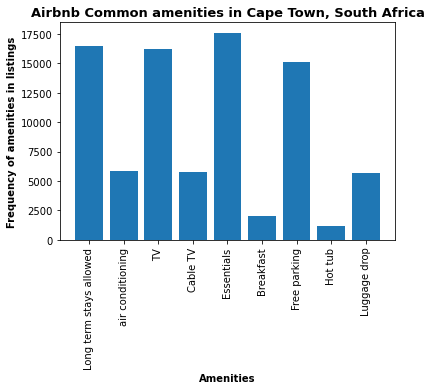

In [47]:
# Visualizing data for common amenities in airbnbs in Cape town, SA
import matplotlib.pyplot  # Import relevant libraries
matplotlib.pyplot.bar(x = ["Long term stays allowed", "air conditioning", "TV",
                           "Cable TV","Essentials", "Breakfast",
                           "Free parking", "Hot tub",
                          "Luggage drop"],
                      height = [long_term_cape,air_con_cape, tv_cape, cable_tv_cape, essentials_cape,
                          breakfast_cape, free_parking_cape,hot_tub_cape,luggage_drop_cape]);
# Adding labels, ticks and titles for more information
plt.xticks(rotation=90)
plt.xlabel("Amenities", fontweight="bold")
plt.ylabel("Frequency of amenities in listings", fontweight="bold")
plt.title("Airbnb Common amenities in Cape Town, South Africa", fontweight="bold", fontsize=13);

The above plot shows that most common amenities listed by airbnb hosts in Cape town are: Long term stays allowed, TV, Essentials and Free parking. 

As per an airbnb blog post (https://news.airbnb.com/amenities-do-matter-airbnb-reveals-which-amenities-guests-search-for-most/), most people prefer comfort over connectivity. Survey data indicated that a large number of people in the US (59%), Australia (46%) and Italy (39%) prefer air conditioning as an important indoor amenities over internet/wifi and full kitchens.

Our brief exploratory analysis shows that air conditioning, cable tv, breakfast and hot tub are the least common amenities placed by airbnb hosts. It therfore seems that there is a gap. Most clients would prefer to have amenities that provide comfort but the airbnb host amenities listings from Guateng indicate a different story. Amenities that would most likely provide comfort like air conditioning are the least common amenities. 

### Comparing common amenities in Gauteng vs Capetown South Africa

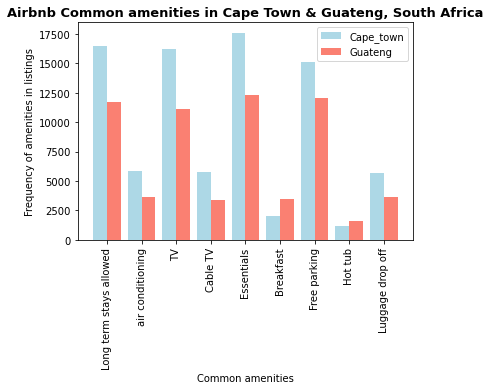

In [48]:
# Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np
# setting x axis
labels =["Long term stays allowed", "air conditioning", "TV", "Cable TV","Essentials", "Breakfast",
        "Free parking", "Hot tub", "Luggage drop off"]
# y axis (contains frequency of amenities in airbnb listings)
cape_town =[long_term_cape,air_con_cape, tv_cape, cable_tv_cape, essentials_cape,breakfast_cape,
             free_parking_cape,hot_tub_cape,luggage_drop_cape]
guateng =[long_term_guateng,air_con_guateng, tv_guateng, cable_tv_guateng, essentials_guateng,
               breakfast_guateng,free_parking_guateng,hot_tub_guateng,luggage_drop_guateng]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cape_town, width, label='Cape_town', color="lightblue")
rects2 = ax.bar(x + width/2, guateng , width, label='Guateng', color ="salmon")

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency of amenities in listings')
ax.set_xlabel('Common amenities')
ax.set_title('Airbnb Common amenities in Cape Town & Guateng, South Africa',fontweight="bold", fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
figsize=(10,6)

plt.show();

The above plot shows a comparison of common amenities in Cape town and Gauteng, South Africa. There seems to be a similar trend in frequency of common amenities in listings in both cities. The most common amenities in both cities are : Long term stays allowed, TV, Essentials and Free parking. I also noted that generally Cape Town seems to have more occurences of amenities than Gauteng i.e **Cape town has more amenities popping up accross the listings data than Guateng.** I thought perhaps this could be attributed to the population of the cities. My hypothesis was: **cities that have a larger population most likely have more airbnb hosts listings than cities with small populations.** However that was not the case. As per statistics from https://worldpopulationreview.com/world-cities , Guateng has a population of 5,926,668 while Cape town has a population of 4,709,990 as of 2021. The most likely reason may be the average income of individuals (purchasing power). This requires further research. However due to time constraints I did not analyse this further.

**Conclusion**

Generally it seems that amenities that would most likely provide comfort (breakfast, hot tub, air conditioning) are the least common among airbnb host listings data in both cities.

## 6. Data analysis
Yet to be conducted:
 * look at common amenities vs review rating
 * look at common amenities vs review comments (need to categorize what is positive &   negative comment)
 * If possible gather revenue data from other sources and look at common amenities vs income made by airbnb hosts
## 7. Data visualization and communication
Yet to be conducted 
## 8. Findings 
Yet to be conducted 
## 9. Conclusion
Yet to be conducted
